# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Train

In [2]:
train_df = pd.read_csv("/kaggle/input/plant-pathology-2020-fgvc7/train.csv")
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


### Test

In [3]:
test_df = pd.read_csv("/kaggle/input/plant-pathology-2020-fgvc7/test.csv")
test_df.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


## Overview Statistics

In [4]:
train_df.describe()

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


# EDA

In [6]:
healthy_label = train_df['healthy'].value_counts()[1]
healthy_label

516

In [7]:
multiple_diseases = train_df['multiple_diseases'].value_counts()[1]
multiple_diseases

91

In [8]:
scab = train_df['scab'].value_counts()[1]
scab

592

In [9]:
rust = train_df['rust'].value_counts()[1]
rust

622

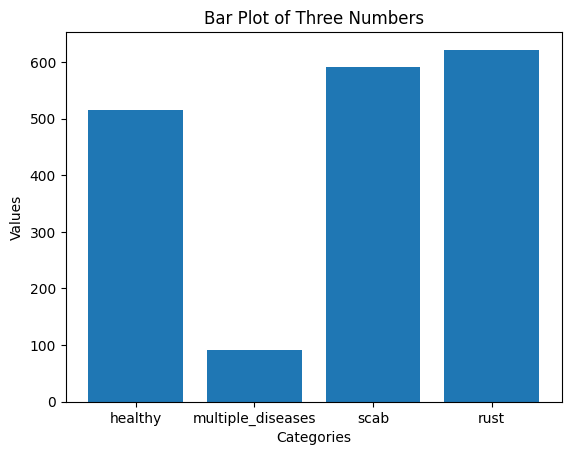

In [10]:
import matplotlib.pyplot as plt

# Data
numbers = [healthy_label, multiple_diseases, scab, rust]
labels = ['healthy', 'multiple_diseases', 'scab', 'rust']

# Create bar plot
plt.bar(labels, numbers)

# Add title and labels
plt.title('Bar Plot of Three Numbers')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show plot
plt.show()


### Conclusion
We notice that the multiple_disease class has the least number of samples. Therefore, we will attempt to increase the number of samples by employing augmentation techniques, aiming to ensure equal treatment of all classes by the model.

# Reformat the Data

In [11]:
import os
import pandas as pd

# Function to construct image path
def construct_image_path(image_id, folder_path):
    # Assuming all images are in JPG format
    image_path = os.path.join(folder_path, image_id + ".jpg")
    return image_path

# Sample dataframe

# Path to the folder containing the images
images_folder_path = "/kaggle/input/plant-pathology-2020-fgvc7/images"

# Apply the function to create a new column containing image paths
train_df['image_path'] = train_df['image_id'].apply(lambda x: construct_image_path(x, images_folder_path))

# Print the dataframe with the new column
train_df

,image_id,healthy,multiple_diseases,rust,scab,image_path
0,Train_0,0,0,0,1,/kaggle/input/plant-pathology-2020-fgvc7/image...
1,Train_1,0,1,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
2,Train_2,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
3,Train_3,0,0,1,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
4,Train_4,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,/kaggle/input/plant-pathology-2020-fgvc7/image...
1817,Train_1817,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
1818,Train_1818,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
1819,Train_1819,0,0,1,0,/kaggle/input/plant-pathology-2020-fgvc7/image...


In [12]:
import os
import shutil

def copy_images_by_column(train_df, column_name):
    # Filtered dataframe where the specified column equals 1
    filtered_df = train_df[train_df[column_name] == 1]

    # Path to the output folder for the specified column
    output_folder = os.path.join("output", column_name)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through the filtered dataframe and copy images to the output folder
    for _, row in filtered_df.iterrows():
        image_path = row['image_path']
        image_name = os.path.basename(image_path)
        output_path = os.path.join(output_folder, image_name)
        shutil.copyfile(image_path, output_path)

    print(f"Images for {column_name} copied to {output_folder} folder successfully.")

# Example usage:
copy_images_by_column(train_df, 'healthy')
copy_images_by_column(train_df, 'rust')
copy_images_by_column(train_df, 'scab')
copy_images_by_column(train_df, 'multiple_diseases')


Images for healthy copied to output/healthy folder successfully.
Images for rust copied to output/rust folder successfully.
Images for scab copied to output/scab folder successfully.
Images for multiple_diseases copied to output/multiple_diseases folder successfully.


In [13]:
import cv2
import os
import numpy as np
import random   

# Define the path to your folder containing images
folder_path = "/kaggle/working/output/  multiple_diseases"

# Function to augment images
def augment_images(image_path, target_count):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image '{image_path}'. Skipping...")
        return

    filename = os.path.basename(image_path)
    filename_no_ext, ext = os.path.splitext(filename)
    output_dir = os.path.dirname(image_path)

    # Calculate the number of augmented images to generate for this original image
    num_augmented_images = round(target_count / len(os.listdir(output_dir)))

    # Rotation augmentation
    for angle in range(10, 360, 60):  # Reduced rotation angles to create 1 image per original
        rotated = cv2.rotate(image, angle)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_rotated_{angle}{ext}"), rotated)
        num_augmented_images -= 1
        if num_augmented_images == 0:
            break

    # Flip augmentation
    if num_augmented_images > 0:
        flipped_horizontal = cv2.flip(image, 1)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_horizontal{ext}"), flipped_horizontal)
        num_augmented_images -= 1

    if num_augmented_images > 0:
        flipped_vertical = cv2.flip(image, 0)
        cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_vertical{ext}"), flipped_vertical)
        num_augmented_images -= 1

    # Randomly choose between horizontal and vertical flip for the remaining augmentations
    for _ in range(num_augmented_images):
        flip_choice = random.choice(["horizontal", "vertical"])
        if flip_choice == "horizontal":
            flipped = cv2.flip(image, 1)
            cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_{flip_choice}{ext}"), flipped)
        else:
            flipped = cv2.flip(image, 0)
            cv2.imwrite(os.path.join(output_dir, f"{filename_no_ext}_flipped_{flip_choice}{ext}"), flipped)

# Iterate over each image in the folder
image_files = os.listdir(folder_path)
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    augment_images(image_path, 400)  # Augment each image to reach a total of 400 images

print("Augmentation completed.")


Augmentation completed.


## Split the data into train, test, val

In [14]:
import os
import shutil
import random

# Set the path to your dataset folder
dataset_folder = "/kaggle/working/output"

# Define the percentages for train, test, and validation sets
train_percent = 0.7
test_percent = 0.2
val_percent = 0.1

# Create a folder for final output
final_output_folder = "/kaggle/working/final_output"
os.makedirs(final_output_folder, exist_ok=True)

# Create folders for train, test, and validation sets inside final_output
train_folder = os.path.join(final_output_folder, "train")
test_folder = os.path.join(final_output_folder, "test")
val_folder = os.path.join(final_output_folder, "val")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Loop through each class folder in the dataset
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)
    if os.path.isdir(class_path):
        # Create corresponding class folders in train, test, and val sets
        train_class_path = os.path.join(train_folder, class_folder)
        test_class_path = os.path.join(test_folder, class_folder)
        val_class_path = os.path.join(val_folder, class_folder)

        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)
        os.makedirs(val_class_path, exist_ok=True)

        # Get the list of images in the class folder
        images = os.listdir(class_path)
        # Shuffle the images randomly
        random.shuffle(images)

        # Calculate the number of images for each set
        num_train = int(len(images) * train_percent)
        num_test = int(len(images) * test_percent)
        num_val = len(images) - num_train - num_test

        # Copy images to train set
        for img in images[:num_train]:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_path, img))

        # Copy images to test set
        for img in images[num_train:num_train + num_test]:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_class_path, img))

        # Copy images to validation set
        for img in images[num_train + num_test:]:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_class_path, img))


# Data Preprocessing & Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for train, test, and validation data
train_dir = '/kaggle/working/final_output/train'
test_dir = '/kaggle/working/final_output/test'
val_dir = '/kaggle/working/final_output/val'

# Define data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create train, test, and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


2024-06-20 16:21:21.606992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 16:21:21.607118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 16:21:21.796435: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1408 images belonging to 4 classes.
Found 401 images belonging to 4 classes.
Found 205 images belonging to 4 classes.


# Model Building

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
base_model.trainable = False

# Create a new model on top of the pre-trained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/44 ━━━━━━━━━━━━━━━━━━━━ 16:14 23s/step - accuracy: 0.0938 - loss: 2.0867

I0000 00:00:1718900521.389365      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718900521.426171      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 734ms/step - accuracy: 0.4990 - loss: 14.5901

W0000 00:00:1718900557.367085      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5059 - loss: 14.2569 - val_accuracy: 0.7951 - val_loss: 1.0128
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/25


W0000 00:00:1718900564.572742      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 761ms/step - accuracy: 0.7946 - loss: 0.9525 - val_accuracy: 0.8146 - val_loss: 0.9167
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 777ms/step - accuracy: 0.8275 - loss: 0.6988 - val_accuracy: 0.7512 - val_loss: 1.0325
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 778ms/step - accuracy: 0.8569 - loss: 0.4705 - val_accuracy: 0.8000 - val_loss: 0.6949
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 728ms/step - accuracy: 0.8705 - loss: 0.4669 - val_accuracy: 0.8390 - val_loss: 0.7767
Epoch 10/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy

## Result

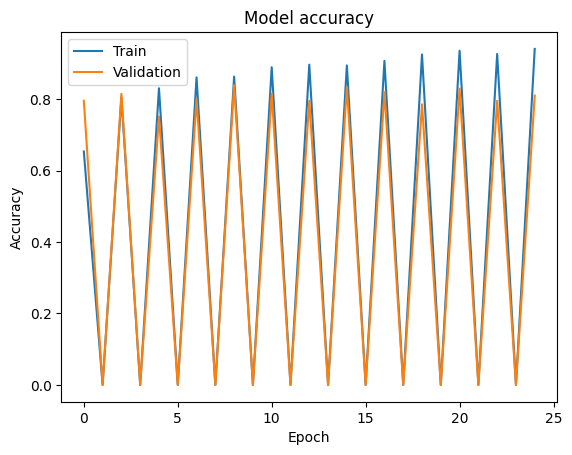

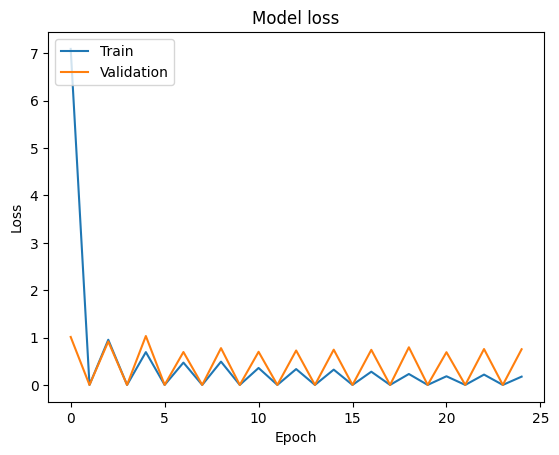

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 909ms/step - accuracy: 0.8345 - loss: 0.6297
Test accuracy: 0.8329176902770996


W0000 00:00:1718901045.712015      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step

W0000 00:00:1718901052.022114      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 715ms/step


W0000 00:00:1718901060.599999      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


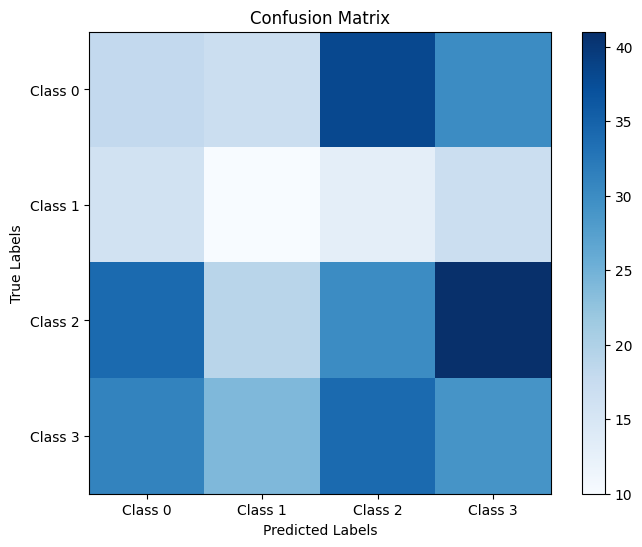

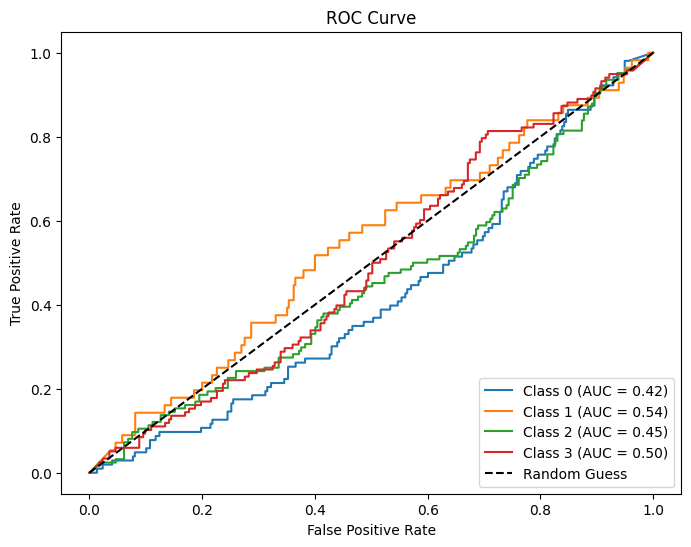

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Make predictions on test data
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(4), labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.yticks(ticks=np.arange(4), labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.show()

# Compute ROC curve and AUC for each class
num_classes = len(np.unique(y_true))
fpr = dict()
tpr = dict()
roc_auc = dict()
y_true_binary = to_categorical(y_true, num_classes=num_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Conclusion
After trying different architectures of CNN, MobileNet emerged with the highest accuracy. The issue with previous models was their tendency to overfit the data due to the small number of samples available. Interestingly, the models with lower accuracy had a larger number of weights, whereas MobileNetV2, with the fewest weights, yielded the best accuracy.